# Estimating Salary of Major League Baseball Players

## Phase 2

## Charlie Lock

## Contents:
- #### Introduction
- Phase 1 Summary
- Report Overview
- Overview of Methodology


- #### Predictive Modelling
- Feature Selection
- Model Fitting and Tuning
- Model Comparison


- #### Critiques and Limitations


- #### Summary and Conclusions
- Project Summary
- Summary of Findings
- Conclusion



In [121]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 

## Introduction:

In [122]:
df = pd.read_csv("baseballsalaries.csv")

df.head(10)

,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary
0,0.271,0.328,74,161,22,6,12,58,49,133,23,17,1,1,0,0,109
1,0.264,0.318,24,48,7,0,1,22,15,18,0,7,0,0,0,0,160
2,0.251,0.338,101,141,35,3,32,105,71,104,34,6,0,0,1,0,2700
3,0.224,0.274,28,94,21,1,1,44,27,54,2,7,1,1,0,0,550
4,0.206,0.262,14,51,18,1,1,28,17,26,0,3,1,1,0,0,300
5,0.238,0.272,53,106,18,3,15,59,22,107,14,7,0,0,0,0,230
6,0.115,0.148,0,3,1,0,0,2,1,6,0,3,0,0,0,0,109
7,0.307,0.405,98,167,35,1,14,52,84,72,0,15,0,0,0,0,560
8,0.187,0.281,38,50,9,2,15,37,32,98,0,9,0,0,0,0,142
9,0.266,0.359,115,152,32,1,44,122,78,152,26,9,1,0,0,0,4300


### Phase 1 Summary:
This report has been broken down into two sections, phase 1 and phase 2. The work completed in phase 1 of the report centred around introducing the data set and attempting to analyse it using various machine learning techniques. The report began by summarising the data set which contained 337 observations and 16 features. The complete data set included the salary of a Major League Baseball player as well as a number of other descriptive features such as total runs, hits, runs batted in (RBIs), walks and errors, in addition to slightly more advanced statistics such as on base percentage and batting average. The data set also acknowledged whether a player is a free agent or whether they were eligible for arbitration.

I began the work by dropping the variables that I considered to be insignificant to the data analysis as they were all almost directly correlated to other variables that would be kept in the data set. I then continued the data cleaning process by scanning the data set for missing values, fortunately no missing values were found so no observations would have to be dropped or have their values replaced.

Progressing to the next section of the report I underwent the process of data visualisation and exploration, using a variety of diagrams to further explore the correlation between the target variable (salary) and the other descriptive features in the data set. This analysis would help when attempting to understand why a variable is considered significant and hence the number of features that should be dropped from the data in the feature selection section of the phase 2 report. 



### Report Overview:
This report begins with a brief summary of the contents of the first section of this report (Phase 1) and also briefly discusses how the analysis found in that section of the report relates to the work completed in the following phase 2 report. The overview of methodology is where I go into detail around the predictive modelling procedures I conducted in this report.

The main section of this report is the predictive modelling section which is broken down into 3 individual sub-sections (Feature selection, model fitting and tuning and model comparison). In the feature selection section I use machine learning techniques to select the eight most important features in relation to the target feature. In the following section, I test various parameters in three different algorithms (Decision Tree regressor, K-nearest neighbours regressor and the random forest regressor) to find the algorithm that fits the data set the most adequately. 


### Overview of Methodology:
Initially, I dropped a number of features such as doubles and free agency eligibility as they lacked relevance to the overall data set. I also renamed the 'salary' variable to 'target' which would make the following machine learning processes more simple. I continued the work by splitting the data into training data and test data using a 70:30 ratio. The test data would be used for the comparison of the models performance whilst the training data would be used for tuning each of the three algorithms. 

Feature selection involved using the random forest regressor to select the eight most important features to the data with 100 estimators and a random state of 999. By using the values function I can find the most important features and then using the feature_importances_ function I can find the scores of these features. I then visualise the results using matplotlib and finally create a new data sample using only the 8 most significant features.

I then analyse the effectiveness of the three previously mentioned models by fitting the training data to the algorithms and adjusting the parameters using a user-created function. I use the regressor algorithms because it is a regression problem rather than a classification problem. For the decision tree regressor I adjust the max depth and the minimum samples split. For the K-Nearest Neighbors regressor I adjust the number of neighbors and the power parameter. Finally, for the random forest regressor I adjust the max depth and number of estimators. I outputted the results and then use matplotlib to plot the results to visualise the best parameters for each of the three algorithms.

In the model comparison I find the max depth with the best scores from the decision tree regressor, the power parameters with the best scores from the KNeighbors regressor and the max depth with the best scores from the random forest regressor. Using the results from the describe() function the random forest regressor appears to have the most sufficient algorithm so I used paired t-tests to compare the RF results to the results from the other two models.

## Predictive Modelling:

### Feature Selection:

In [123]:
df_2 = df.drop(columns = ['Salary', ' Doubles', ' Triples', ' Free_agency_eligibility', ' Arbitration_eligibility'])
target = df['Salary']

In [124]:
df_2.describe()

,Batting_average,On-base_percentage,Runs,Hits,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agent,Arbitration
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,0.257825,0.323973,46.697329,92.833828,9.097923,44.020772,35.017804,56.706231,8.246291,6.771513,0.115727,0.029674
std,0.039546,0.047132,29.020166,51.896322,9.289934,29.559406,24.842474,33.828784,11.664782,5.927490,0.320373,0.169938
min,0.063000,0.063000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238000,0.297000,22.000000,51.000000,2.000000,21.000000,15.000000,31.000000,1.000000,3.000000,0.000000,0.000000
50%,0.260000,0.323000,41.000000,91.000000,6.000000,39.000000,30.000000,49.000000,4.000000,5.000000,0.000000,0.000000
75%,0.281000,0.354000,69.000000,136.000000,15.000000,66.000000,49.000000,78.000000,11.000000,9.000000,0.000000,0.000000
max,0.457000,0.486000,133.000000,216.000000,44.000000,133.000000,138.000000,175.000000,76.000000,31.000000,1.000000,1.000000


In [253]:
from sklearn.model_selection import train_test_split
Dtrain, Dtest, ttrain, ttest = train_test_split(df_2.values, 
                                                    target.values, 
                                                    test_size=0.3, 
                                                    random_state=999)

print(Dtrain.shape)
print(Dtest.shape)
print(ttrain.shape)
print(ttest.shape)

(235, 12)
(102, 12)
(235,)
(102,)


In [266]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor(n_estimators=100, random_state=999)
forest1.fit(df_2, target)
forest_indices2 = np.argsort(forest1.feature_importances_)[::-1][0:8]

feature_scores = forest1.feature_importances_[forest_indices2]
features1 = df_2.columns[forest_indices2].values

print(feature_scores)
print(features1)

[0.27642298 0.23237629 0.09732583 0.06981958 0.06724778 0.06016537
 0.04834771 0.04538819]
[' Runs' ' Runs_batted_in' ' Hits' ' HomeRuns' ' Strike-Outs' ' Walks'
 ' Stolen_bases' ' On-base_percentage']


In [290]:
import matplotlib.pyplot as plt

def features_plot(features, scores): 
    plt.barh(features, scores)
    plt.title("Most Significant Features")
    plt.xlabel("Significance")
    plt.show()

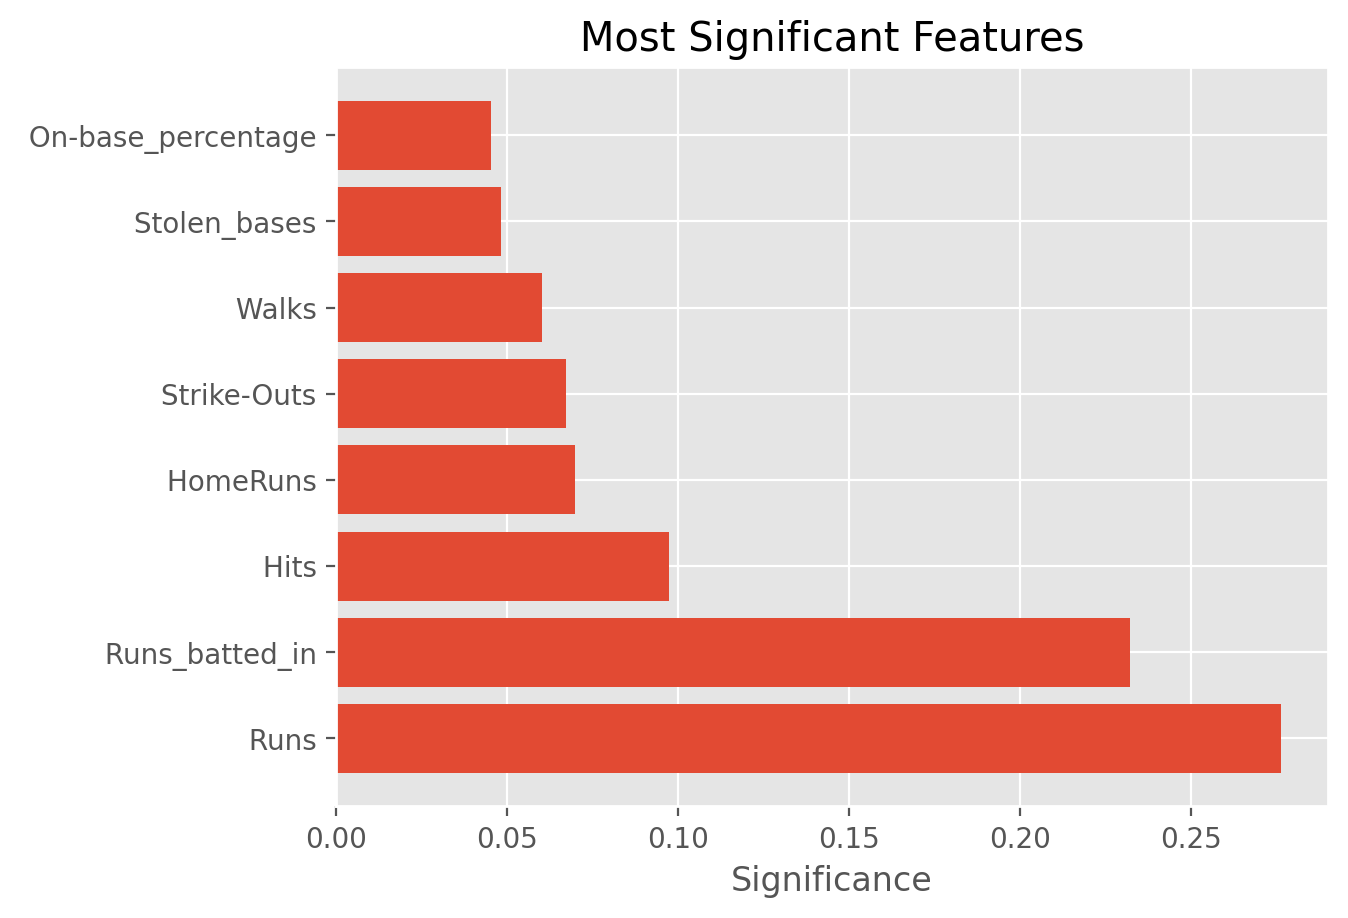

In [291]:
features_plot(features1, feature_scores)

In [293]:
Dtrain2 = D_train[:, forest_indices2]
Dtest2  = D_test[:, forest_indices2]

Using the "Most Significant Features" plot to visualise the scores representing the importance of the eight most statistically important individual features it can be seen that runs and runs batted in (RBIs) are both considered more than twice as important as any other feature. Surprisingly, more advanced statistics such as batting average and on-base percentage either aren't featured at all in the eight most important features or are considered to be comparatively insignificant to the salary of a player. The most likely reason for these two statistics lacking in importance is because the data set is from the 1992 MLB season which is a decade before the Oakland Athletics revolutionised baseball using mainly on-base percentage to identify players they would target for their roster. 

Free agency and arbitration are also not found in the eight most important features so despite the box plots from phase 1 suggesting both have a positive effect on salary, it is likely due to the fact that the players that use free agency and arbitration are better than the average player rather than free agency and arbitration actually significantly increasing their salary above their worth. 

Strike outs being the fifth most important feature despite being considered a negative statistic can be explained by the reality that the best players in baseball have more opportunities to bat and therefore more opportunities to strike out.

# Model Fitting and Tuning

## Decision Tree Regressor

In [332]:
from sklearn.tree import DecisionTreeRegressor

a1 = np.array([10, 20, 30, 50, 60, 75, 100, 110, 125, 150])

dt_score1 = []
dt_score2 = []
dt_score3 = []

for a in a1:
    tree_regression1 = DecisionTreeRegressor(max_depth = 100, min_samples_split = a)
    tree_regression1.fit(Dtrain2, ttrain)
    dt_score1 = dt_score1 + [tree_regression1.score(Dtest2, ttest)]
    
    tree_regression2 = DecisionTreeRegressor(max_depth = 200, min_samples_split = a)
    tree_regression2.fit(Dtrain2, ttrain)
    dt_score2 = dt_score2 + [tree_regression2.score(Dtest2, ttest)]
    
    tree_regression3 = DecisionTreeRegressor(max_depth = 300, min_samples_split = a)
    tree_regression3.fit(Dtrain2, ttrain)
    dt_score3 = dt_score3 + [tree_regression3.score(Dtest2, ttest)]

In [333]:
results1 = pd.DataFrame({'dt_score1': dt_score1,
                       'dt_score2': dt_score2,
                       'dt_score3': dt_score3},
                      index = a1)
results1

,dt_score1,dt_score2,dt_score3
10,0.103638,0.091870,0.091870
20,0.229829,0.229829,0.229829
30,0.343052,0.343052,0.343052
50,0.393158,0.393158,0.393158
60,0.422965,0.422965,0.422965
75,0.414025,0.414025,0.414025
100,0.411685,0.411685,0.411685
110,0.411685,0.411685,0.411685
125,0.401758,0.401758,0.401758
150,0.401758,0.401758,0.401758


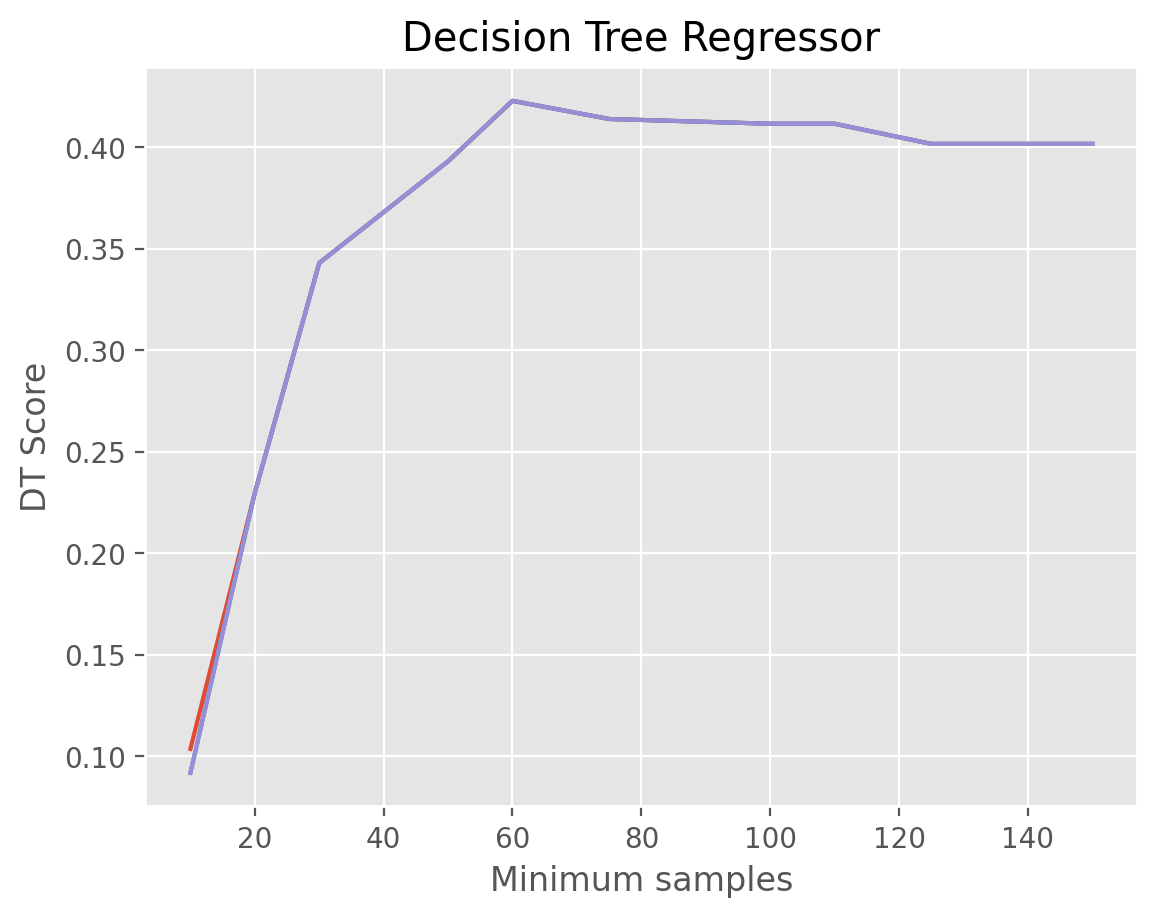

In [389]:
plt.plot(results1)

plt.title('Decision Tree Regressor')
plt.xlabel('Minimum samples')
plt.ylabel('DT Score')
plt.show();

The best parameters based off the given information for the decision tree regressor is when "minimum_samples" = 60. The max depth has no influence. 

## KNeighbors Regressor

In [385]:
from sklearn.neighbors import KNeighborsRegressor

b2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

knn_score1 = []
knn_score2 = []
knn_score3 = []

for b in b2:
    knn_regression1 = KNeighborsRegressor(n_neighbors = b, p = 1)
    knn_regression1.fit(Dtrain2, ttrain)
    knn_score1 = knn_score1 + [knn_regression1.score(Dtest2, ttest)]
    
    knn_regression2 = KNeighborsRegressor(n_neighbors = b, p = 3)
    knn_regression2.fit(Dtrain2, ttrain)
    knn_score2 = knn_score2 + [knn_regression2.score(Dtest2, ttest)]
    
    knn_regression3 = KNeighborsRegressor(n_neighbors = b, p = 5)
    knn_regression3.fit(Dtrain2, ttrain)
    knn_score3 = knn_score3 + [knn_regression3.score(Dtest2, ttest)]

In [386]:
results2 = pd.DataFrame({'knn_score1': knnscore1,
                       'knn_score2': knnscore2,
                       'knn_score3': knnscore3},
                      index = b2)
results2

,knn_score1,knn_score2,knn_score3
1,-0.045640,0.163801,0.126188
2,0.246617,0.330494,0.280115
3,0.347570,0.404442,0.331556
4,0.394608,0.371460,0.381536
5,0.430639,0.385602,0.410890
6,0.437327,0.415377,0.392285
7,0.441533,0.397694,0.377799
8,0.454423,0.419972,0.391050
9,0.429610,0.417102,0.419775
10,0.453961,0.413260,0.436834


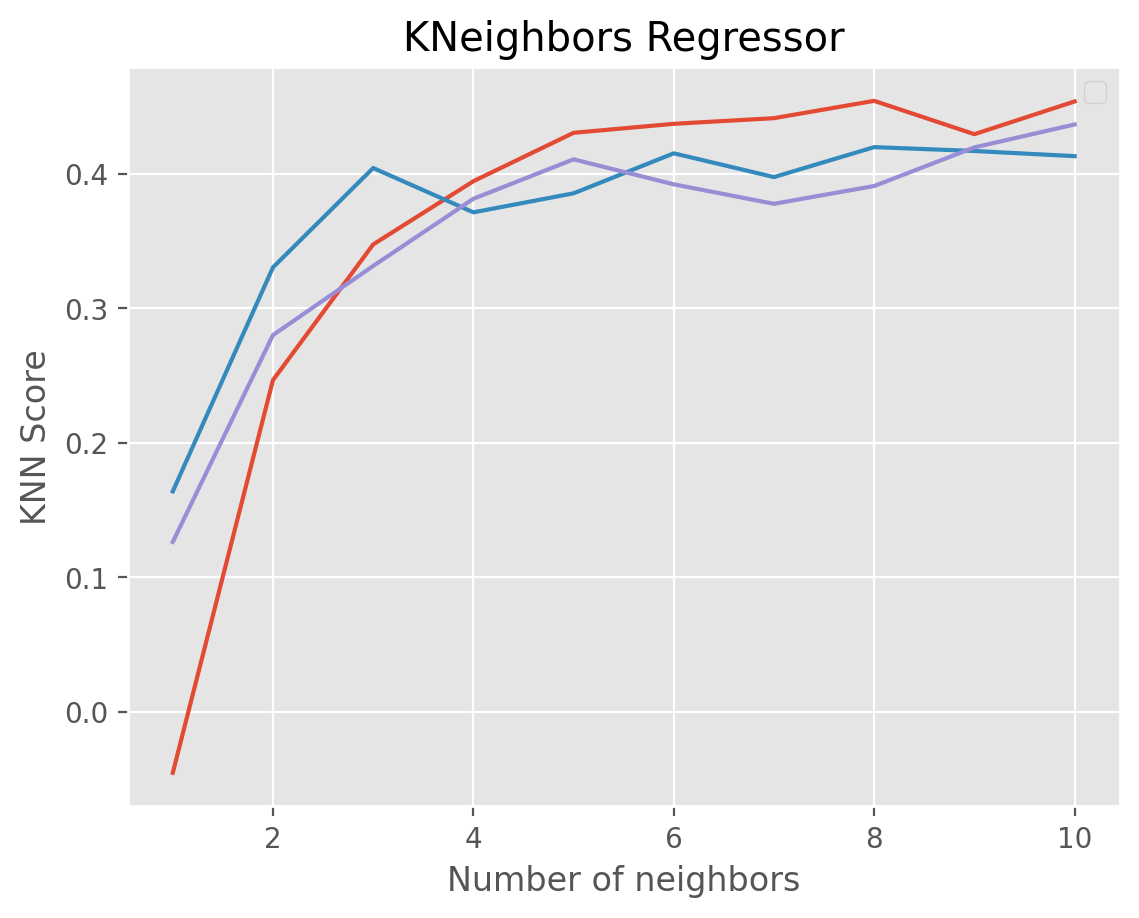

In [388]:
plt.plot(results2)

plt.title('KNeighbors Regressor')
plt.xlabel('Number of neighbors')
plt.ylabel('KNN Score')
plt.show();

The best parameters based off the given information for the K-Neighbors regressor are "n_neighbors" = 8 and "p" = 1.

## Random Forest Regressor

In [324]:
from sklearn.ensemble import RandomForestRegressor

c3 = np.array([10,30,50,70, 90, 110, 130, 150, 170, 200])

rf_score1 = []
rf_score2 = []
rf_score3 = []

for c in c3:
    forest_regression1 = RandomForestRegressor(n_estimators = 100, max_depth = c)
    forest_regression1.fit(Dtrain2, ttrain)
    rf_score1 = rf_score1 + [forest_regression1.score(Dtest2, ttest)]
    
    forest_regression2 = RandomForestRegressor(n_estimators = 200, max_depth = c)
    forest_regression2.fit(Dtrain2, ttrain)
    rf_score2 = rf_score2 + [forest_regression2.score(Dtest2, ttest)]
    
    forest_regression3 = RandomForestRegressor(n_estimators = 300, max_depth = c)
    forest_regression3.fit(Dtrain2, ttrain)
    rf_score3 = rf_score3 + [forest_regression3.score(Dtest2, ttest)]

In [325]:
results3 = pd.DataFrame({'rf_score1': rf_score1,
                       'rf_score2': rf_score2,
                       'rf_score3': rf_score3},
                      index = c3)
results3

,rf_score1,rf_score2,rf_score3
10,0.460960,0.460732,0.445278
30,0.456294,0.450600,0.446846
50,0.430121,0.452242,0.451823
70,0.443947,0.465137,0.443675
90,0.454183,0.448912,0.457338
110,0.444988,0.464135,0.437632
130,0.456295,0.462155,0.433735
150,0.449849,0.434931,0.441650
170,0.458097,0.440707,0.450362
200,0.426115,0.459449,0.443545


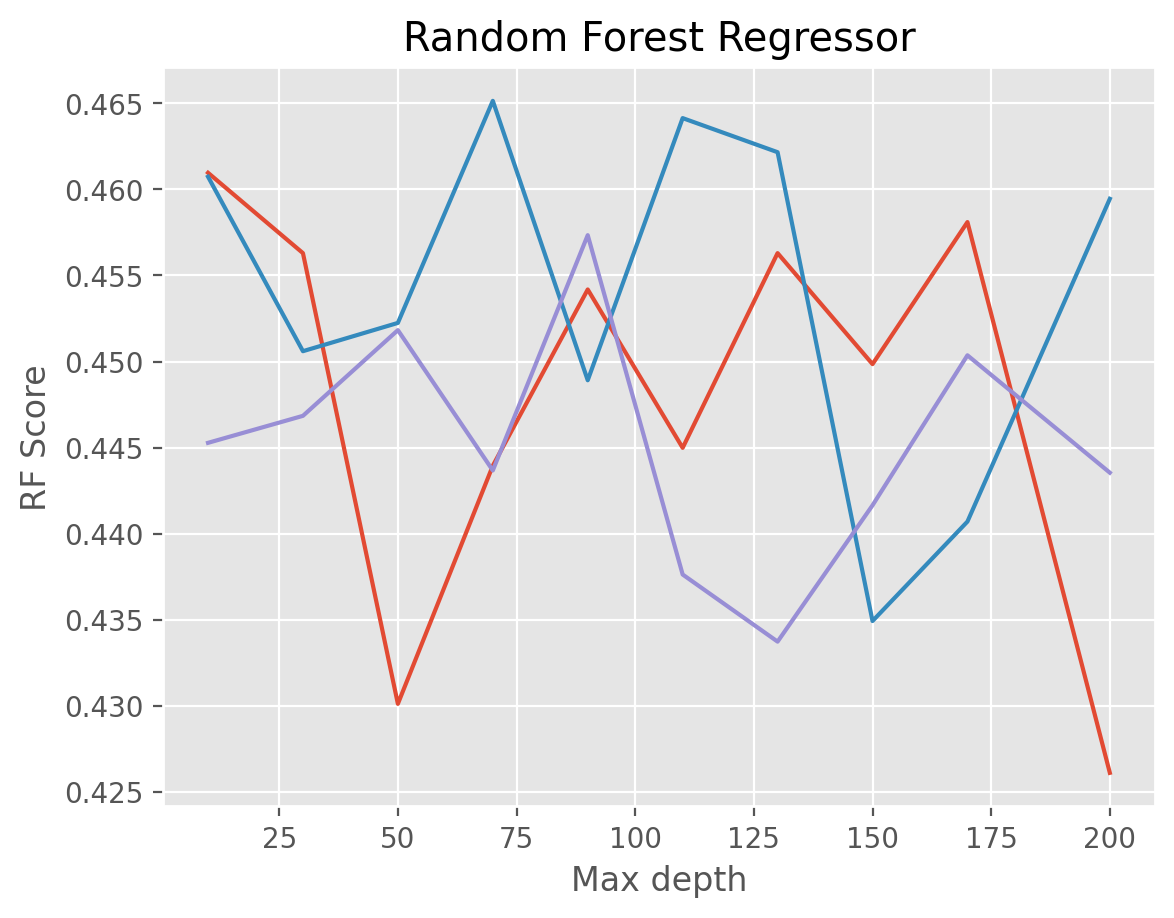

In [353]:
plt.plot(results3)

plt.title('Random Forest Regressor')
plt.xlabel('Max depth')
plt.ylabel('RF Score')
plt.show();

The best parameters based off the given information for the random forest regressor are "n_estimators" = 200 and "max_depth" = 70. 

# Model Comparison

In [340]:
results1.describe()

,dt_score1,dt_score2,dt_score3
count,10.000000,10.000000,10.000000
mean,0.353355,0.352179,0.352179
std,0.105053,0.108180,0.108180
min,0.103638,0.091870,0.091870
25%,0.355578,0.355578,0.355578
50%,0.401758,0.401758,0.401758
75%,0.411685,0.411685,0.411685
max,0.422965,0.422965,0.422965


In [387]:
results2.describe()

,knn_score1,knn_score2,knn_score3
count,10.000000,10.000000,10.000000
mean,0.359065,0.371921,0.354803
std,0.155974,0.078093,0.092161
min,-0.045640,0.163801,0.126188
25%,0.359330,0.374996,0.343117
50%,0.430125,0.401068,0.386293
75%,0.440482,0.414848,0.406239
max,0.454423,0.419972,0.436834


In [326]:
results3.describe()

,rf_score1,rf_score2,rf_score3
count,10.000000,10.000000,10.000000
mean,0.448085,0.453900,0.445188
std,0.011894,0.010269,0.006887
min,0.426115,0.434931,0.433735
25%,0.444207,0.449334,0.442124
50%,0.452016,0.455845,0.444477
75%,0.456295,0.461799,0.449483
max,0.460960,0.465137,0.457338


In [390]:
from scipy import stats

stats.ttest_rel(rf_score2, dt_score1)

Ttest_relResult(statistic=2.9665528216490022, pvalue=0.01579056613120149)

In [391]:
stats.ttest_rel(rf_score2, knn_score1)

Ttest_relResult(statistic=1.8923914141143956, pvalue=0.09098793587162875)

The output of the describe() function suggest the random forest regressor is the best model. Using paired t-tests to compare the other two models with the random forest regressor the results are outputted. When comparing with the decision tree regressor the p-value is found to be 0.0158 which is less than the chosen significance level of 0.05. This suggests that using a 95% significance level, it can be concluded that the random forest regressor is a better model for this data set than the decision tree regressor model. 

However, when comparing the RF model to the KNN model the p-value is 0.09 which is greater than the significance level so it cannot be concluded using a 95% significance level that the RF model is a better model than the KNN model. 

# Critiques and Limitations:
In this section of the report I will go into detail in my attempt to analyse the way in which I approached this project and in particular, discuss the weakness and limitations of my analysis and the overall data set, as well as some areas that went according to plan. Initially, the chosen data set was of baseball salaries from players that played in the 1992 Major League Baseball (MLB) season. Although statistics was slowly becoming a more significant factor in player and team analysis across all sports, it was still not yet used close to as much as it used in the current day and age. As mentioned in phase 1, the burst into prominence of statistical analysis in baseball came in and after the 2002 MLB season when the Oakland Athletics and in particular, their general manager, Billy Beane overcame financial limits to create a team using a select number of statistics that would drastically over perform outside expectations and become one of the best teams in the league. However, as stated the data set was from ten years prior to that and so statistics would not have as a significant effect on player salaries as it would in the modern game which is a highly likely reason for the algorithms not producing the high scores required that would result in a sufficient algorithm.

Another consideration for areas of improvement for the report is the way I approached trying to find the best parameters for the chosen algorithms. Rather than using the GridSearchCV function to find the optimal parameter values I chose to attempt to find them manually. This likely had a minor effect on the maximum score of the three algorithms and also added uneccesary time to the completion of the report as it using the GridSearchCV function would have taken less time to produce. 

It was discovered using mainly scatterplots in phase 1 that batting average and on base percentage had a significant correlation with the salary of a player, however since neither of these statistics are influenced by sample size, some of the significant outliers are likely from players that only played a small number of games and aren't relevant to the overall analysis. This likely also contributed to the low scores outputted from the various algorithms used in phase 2 and hence more work could have been done to reduce the influence of these outliers.


Finally, the sample size was limited and splitting the data into train and test was likely the incorrect decision as it made the data set even smaller. It certainly would have been preferable to have many more observations in the data set in order to create a more reliable analysis. 



# Summary and Conclusions:

## Project Summary:
The phase 1 report began by reading the data set into the report and introducing with the source and a brief description of the data set. Every feature was then listed and given a description alongside the unit of the variable in addition to the data type (numeric, etc.). The goals and objectives were outlined and then the work moved into the data cleaning and preprocessing section of the report. 

In order to analyse the data set it would have to be scanned for potential missing values or incorrect values and then if any issues were found, various data cleaning and preprocessing techniques would have to be completed to appropriately deal with these potential issues. I used the isna() function to find any NA values. Fortunately, there were no missing or incorrect values in the data set and no observations would need to be cleaned. However, through thorough observation of the variables it was decided that 4 of the variables weren't required in this analysis and could be dropped from the overall data set.

The next step in the report was data exploration and visualisation which involved using a number of different charts and graphs to analyse some of the variables in the data set. The exploration was separated into 3 main sections. The sections were visualisation using just one variable as well as visualisation using two and three variables. In the one variable visualisation section I used the seaborn distplot function to create a histogram of the spread of the salary across the data set. Bar charts were then plotted using the countplot function simply comparing whether a player was a free agent or not and then comparing whether a player used arbitration or didn’t. The two-variable visualisation involved using the matplotlib scatter function to create four different scatterplots comparing four different descriptive features to the target variable, salary. Furthermore, I also used the seaborn boxplot function to create two box plots visualising the effects of the free agency and arbitration on salary. Finally, in the three-variable visualisation I created a scatterplot displaying RBIs against salary and used a third variable, free agency to visualise where the players who used free agency were on the plot. I continued the three-variable visualisation by doing the same plot except with arbitration instead of free agency. I finished the exploration and visualisation section by using the Numpy mean function to output the mean of the function in order to help explain some of the plots. 

Progressing on to phase 2 of the report. After reading in the data again, I created a new data frame with the dropped variables no longer included and the target feature being identified. I then split the data into the training and test sets with the training data set containing 70% of the observations and the test data set containing the other 30%. The random forest regressor was then used to identify the 8 most significant variables using the Numpy argsort function to sort out the eight variables and then the feature_importances_ function to output the scores of the variables. Matplotlib was used next to create a bar chart visualising the significance of each of the eight most important features. To complete the feature selection process I then created new training and test data sets only containing the eight given features and removing the others. 

The next stage of the report was the model fitting and tuning process. The first algorithm to have a performance analysis was the decision tree regressor. The parameters I was adjusting were the maximum depth and minimum samples split. By fitting the training data to the algorithm I Ould then get the scores from the algorithm for each of the parameters. The results were outputted and then visualised using a line graph from matplotlib. The process of analysis was similar for the following two algorithms with the main difference being the change in the parameters that were adjusted. The K-Neighbors regressor model had the number of neighbours and the power parameter being adjusted. For the third algorithm, the random forest regressor, the parameters being adjusted between turns were maximum depth and the number of estimators. 

In the final stages of the predictive modelling section was the model comparison sub-section where the performance of the various algorithms was compared. I used the describe() function to give descriptive statistics of the performance of each of the parameters within each algorithm and then chose the best parameters for each individual algorithm. The random forest regressor model appeared to have the best performance so I used paired t-tests to compare that model with the other two models using the scipy ttest_rel function and the results were produced and duly analysed.

## Summary of Findings:
As discussed in the critiques and limitations section of the report, it was found using the feature selection analysis that the clear two most significant features were runs and runs batted in. This is likely due to the data set being from 1992 when the quality of a player was mainly perceived using a biased visual observation and simple statistics. Free agency and arbitration did not feature in the eight most statistically significant features despite the findings from phase 1 suggesting arbitration in particular had a reasonably positive effect on the salary of a player. However, the most plausible theory for free agency and arbitration not being a significant feature is that it is the quality of the player that finds themselves in arbitration being higher that causes the average salary to be higher in comparison to those that did not use arbitration, rather than the actual process of arbitration leading to a higher salary than the true worth of the player. 

The process of hyper-parameter tuning lead to finding the best parameters for each model. The best parameters for the random forest regressor model were when "n_estimators" = 200 and "max_depth" = 70. The parameters were "n_neighbors" = 8 and "p" = 1 for the K-Neighbors regressor model to be at its highest level. Finally, the best parameters for the decision tree regressor were when the "minimum_samples" = 60. It was discovered that the max depth had no influence on the statistical quality of the model.

Through comparison of machine learning algorithms it was found that with 95% confidence the random forest regressor was a better model than the decision tree regressor model however it would have required using a significance level of 0.1 to conclude that the random forest regressor model is a better model than the K-Nearest Neighbors model but it could not be said with 95% confidence. 

## Conclusions:
To conclude, this report made a number of findings, such as hits and runs batted in (RBIs) being the most critical factors involved in the salary of a player in the 1992 MLB season and statistics such as on-base percentage and batting average not having the importance that they potentially would have in the modern day. When analysing further the potential success of the main objectives of the project, it can be concluded that the first main objective of finding a model that can reliably identify a player's salary was not successful as the output of the algorithms showed. The second objective of finding the features most critical to the salary of a player was more successful as it was discovered that hits and RBIs were found to be the most important features to the model.